# Let's listify the Contents
- An end-to-end Scikit-Learn workflow
- Getting the data ready
- Choose the right estimator/algorithm for our problems
- Fit the model/algorithm and use it to make predictions on our data
- Evaluating a model
- Putting it all together!

### Import Statements

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# An end-to-end Scikit-Learn Workflow

In [161]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv('Data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [162]:
# Create x (feature matrix)
x = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [163]:
# 2. Choose the right model and hyperparameters
#!pip install -U scikit-learn
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [164]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.25)

In [165]:
clf.fit(x_tr, y_tr);

In [166]:
# import numpy as np
# y_preds = clf.predict(np.array([1, 2, 3, 4]))
# This cell will throw an error

In [167]:
x_tr.shape

(227, 13)

In [168]:
x_tst

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3


In [169]:
y_tst

198    0
48     1
205    0
15     1
134    1
      ..
127    1
251    0
100    1
220    0
179    0
Name: target, Length: 76, dtype: int64

In [170]:
# make a prediction
y_pred = clf.predict(x_tst)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [171]:
# 4. Evaluate the model
clf.score(x_tr, y_tr)

1.0

In [172]:
clf.score(x_tst, y_tst)

0.8421052631578947

In [173]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_tst, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.84      0.88      0.86        42

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [174]:
confusion_matrix(y_tst, y_pred)

array([[27,  7],
       [ 5, 37]], dtype=int64)

In [175]:
accuracy_score(y_tst, y_pred)

0.8421052631578947

In [193]:
# 5. Improve a model
# Try different amount of n_estimators
import numpy as np
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(x_tr, y_tr)
    print(f'Model Accuracy on test set: {clf.score(x_tst, y_tst) * 100: .2f}%')

Trying model with 10 estimators...
Model Accuracy on test set:  80.26%
Trying model with 20 estimators...
Model Accuracy on test set:  85.53%
Trying model with 30 estimators...
Model Accuracy on test set:  84.21%
Trying model with 40 estimators...
Model Accuracy on test set:  84.21%
Trying model with 50 estimators...
Model Accuracy on test set:  86.84%
Trying model with 60 estimators...
Model Accuracy on test set:  81.58%
Trying model with 70 estimators...
Model Accuracy on test set:  84.21%
Trying model with 80 estimators...
Model Accuracy on test set:  82.89%
Trying model with 90 estimators...
Model Accuracy on test set:  86.84%


In [194]:
# 6. Save the model and load it
# clf = RandomForestClassifier(n_estimators=50).fit(x_tr, y_tr)
# print(clf.score(x_tst, y_tst))
import pickle
pickle.dump(clf, open('Model.pk1', 'wb'))

In [196]:
loaded_model = pickle.load(open('Model.pk1', 'rb'))
loaded_model.score(x_tst, y_tst)

0.868421052631579

In [197]:
import warnings
warnings.filterwarnings('ignore')

In [198]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Karth\anaconda3\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.2.0
          pip: 22.3.1
   setuptools: 65.5.0
        numpy: 1.24.1
        scipy: 1.10.0
       Cython: None
       pandas: 1.5.2
   matplotlib: 3.6.2
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: C:\Users\Karth\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
        version: 0.3.21
threading_layer: pthreads
   architecture: Zen
    num_threads: 12

       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: C:\Users\Karth\anaconda3\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None
    num_threads: 12

       user_api: blas
   internal_api: openblas
         prefix: li

## 1. Getting the data ready to be used with Machine Learning

Three main things we have to do:
- Split the data into features and labels (usually 'x' & 'y')
- Filling (also called imputing) or disregarding missing values
- Converting non-numerical values to numerical values (also called feature encoding)

In [199]:
x = heart_disease.drop('target', axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [200]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [201]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.2)

In [202]:
x_tr.shape, x_tst.shape, y_tr.shape, y_tst.shape

((242, 13), (61, 13), (242,), (61,))

## Clean data -> Transform data -> Reduce data
## 1.1 Make sure it's all numerical

In [203]:
carSales = pd.read_csv('Data/car-sales-extended.csv')
carSales.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [204]:
carSales.shape

(1000, 5)

In [205]:
carSales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [206]:
# Split into x/y
x = carSales.drop('Price', axis=1)
y = carSales['Price']

# Split into train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [207]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_train, y_train)

ValueError: could not convert string to float: 'Toyota'

In [209]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [210]:
carSales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [211]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], 
                                remainder='passthrough')
xT = transformer.fit_transform(x)
xT

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [212]:
xT = pd.DataFrame(xT)
xT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [213]:
xT.shape

(1000, 13)

In [214]:
# Alternate method
dummies = pd.get_dummies(carSales[['Make', 'Colour', 'Doors']])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [215]:
# let's refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(xT, y, test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [216]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.891612713353635, 0.3235867221569877)

### 1.2 What if there were missing values?
- Fill them with some value (also known as imputation)
- Remove the samples with missing data altogether

In [262]:
# Import car sales missing data
carSalesMissing = pd.read_csv('Data/car-sales-extended-missing-data.csv')
carSalesMissing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [263]:
carSalesMissing.shape

(1000, 5)

In [264]:
carSalesMissing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [265]:
# create X and Y
X = carSalesMissing.drop('Price', axis=1)
Y = carSalesMissing['Price']

In [266]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [267]:
# let's try to convert our data to numbers
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], 
                                remainder='passthrough')
XT = transformer.fit_transform(X)
XT

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with pandas 

In [268]:
# Fill the 'Make' column
carSalesMissing['Make'].fillna('missing', inplace=True)

# Fill the 'colour' column
carSalesMissing['Colour'].fillna('missing', inplace=True)

# Fill the 'Odometer' column
carSalesMissing['Odometer (KM)'].fillna(carSalesMissing['Odometer (KM)'].mean(), 
                                        inplace=True)

# Fill the 'Doors' column
carSalesMissing['Doors'].fillna(carSalesMissing['Doors'].mode(), inplace=True)

In [269]:
# check our dataframe again
carSalesMissing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

In [270]:
# Remove rows with missing price value
carSalesMissing.dropna(inplace=True)
carSalesMissing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [271]:
carSalesMissing.shape

(903, 5)

In [272]:
X = carSalesMissing.drop('Price', axis=1)
Y = carSalesMissing['Price']

In [273]:
features = ['Make', 'Colour', 'Doors']
oneHot = OneHotEncoder()
transformer = ColumnTransformer([('oneHot', oneHot, features)], 
                           remainder='passthrough')
Xt = transformer.fit_transform(carSalesMissing)
Xt

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [274]:
Xt = pd.DataFrame(Xt)
Xt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0


In [275]:
Y.isna().sum(), Y.shape, Xt.shape

(0, (903,), (903, 16))

In [276]:
x_tr, x_tst, y_tr, y_tst = train_test_split(Xt, Y, test_size=0.2)
Model = RandomForestRegressor()
Model.fit(x_tr, y_tr)
Model.score(x_tst, y_tst)

0.9996282005692237

In [231]:
# Alternate Method
dummies = pd.get_dummies(carSalesMissing[['Make', 'Doors', 'Colour']])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,4.0,0,1,0,0,0,0,0,0,0,1,0
1,5.0,1,0,0,0,0,0,1,0,0,0,0
2,4.0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,0,0,0,1,0,0,0,0,0,1,0
4,3.0,0,0,1,0,0,0,1,0,0,0,0


### Option 2: Fill missing values with Scikit-Learn

In [233]:
carSalesMissing = pd.read_csv('Data/car-sales-extended-missing-data.csv')
carSalesMissing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [234]:
carSalesMissing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [235]:
carSalesMissing.dropna(subset=['Price'], inplace=True)
carSalesMissing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [236]:
# Split into x & y
x = carSalesMissing.drop('Price', axis=1)
y = carSalesMissing['Price']

In [237]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
catImputer = SimpleImputer(strategy='constant', fill_value='missing')
doorImputer = SimpleImputer(strategy='constant', fill_value=4)
numImputer = SimpleImputer(strategy='mean')

# Define columns
catFeatures = ['Make', 'Colour']
doorFeatures = ['Doors']
numFeatures = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([('catImputer', catImputer, catFeatures), 
                             ('doorImputer', doorImputer, doorFeatures), 
                            ('numFeatures', numImputer, numFeatures)])

# Transform the data
X = imputer.fit_transform(x)
X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [238]:
carSalesFilled = pd.DataFrame(X, columns=['Make', 'Colour', 'Doors', 
                                          'Odometer (KM)'])
carSalesFilled[:5]

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [239]:
carSalesFilled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [246]:
categories = ['Make', 'Colour', 'Doors']
encoder = OneHotEncoder()
transformer = ColumnTransformer([('encoder', encoder, categories)])
x = transformer.fit_transform(carSalesFilled)
x

<950x14 sparse matrix of type '<class 'numpy.float64'>'
	with 2850 stored elements in Compressed Sparse Row format>

In [255]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=50)
model.fit(x_tr, y_tr)
model.score(x_tst, y_tst) # Worst Model

0.09183751825337316

In [277]:
len(carSalesFilled), len(carSales)

(950, 1000)

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
- Sklearn refers to machine learning models, algorithms as estimators
- Classification problem - predicting a category (heart disease or not)
* Sometimes you'll see 'clf' (short for classifier) used as a classification estimator
- Regression problem - predicting a number (selling price of a car)

If you're working on a ML problem and looking to use Sklearn and not sure what model you use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a ML model for a regression problem

Let's use the California Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [13]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
housing_df['MedHouseVal'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [64]:
housing_df = housing_df.drop('MedHouseVal', axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
# Import algorithm

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

# Split into train and test set
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.25)
x_tr.shape, x_tst.shape

((15480, 8), (5160, 8))

In [66]:
# Instantiate and fit the model (on the training set)
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
model = Ridge()
model.fit(x_tr, y_tr)

lasso_model = Lasso()
lasso_model.fit(x_tr, y_tr)

# Check the score of the model
model.score(x_tst, y_tst), lasso_model.score(x_tst, y_tst)
# Default det of prediction is R^2

(0.5911128551684499, 0.2854847529538541)

What if 'Ridge' didn't work or the score didn't fit our needs

Well, we could try a different model...

How about we try an ensemble methods (an ensemble is combination of smaller models to try and make better predictions than just a single model)?
Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [67]:
# Import the RandomForestRegressor model class from the ensemble from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
forest = RandomForestRegressor()
forest.fit(x_tr, y_tr)
forest.score(x_tst, y_tst)  # Way better model

0.8078595561901133

## 2.2 Choosing an estimator for a classification probelm
left's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [2]:
import numpy as np
import pandas as pd
heart_disease = pd.read_csv('Data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try LinearSVC

In [42]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(2)

# Make the data
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter = 100000) # max_iter = 100000
clf.fit(x_tr, y_tr)

# Evaluate the LinearSVC
clf.score(x_tst, y_tst)

C:\Users\Karth\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9180327868852459

In [8]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Tidbit:
    
    - If you have structured data, use ensemble methods
    - If you have unstructured data, use deep learning or transfer learning

In [20]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(2)

# Split the data
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_tr, y_tr)

# Evaluate the Model
rfc.score(x_tst, y_tst)

0.8852459016393442

In [24]:
for i in range(10, 100, 10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_tr, y_tr)
    print(rfc.score(x_tst, y_tst))

0.8852459016393442
0.8852459016393442
0.8524590163934426
0.8852459016393442
0.9016393442622951
0.9016393442622951
0.8852459016393442
0.8852459016393442
0.9016393442622951


# 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data
* x = features, feature variables, data
* y = labels, targets, target variables

In [27]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(2)

# Split the data
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=90)
rfc.fit(x_tr, y_tr)

# Evaluate the Model
rfc.score(x_tst, y_tst)

0.9016393442622951

In [25]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Random Forest Model deep dive

These resources will help you (future Karthikheyaa) understand what's happening inside the Random Forest model we've been using.

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)
* [Random Forests in Python by yhat](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)
An implementation and explanation of the Random Forest in Python by Will Koehrsen

# 3.2 Make predictions using ML model

2 ways to make predictions:
    
    1. predict()
    2. predict_proba()

In [28]:
# Use a trained model to make predictions
x_tst.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2


In [30]:
rfc.predict(np.array([1, 3, 4, 6, 9]))

C:\Users\Karth\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 3. 4. 6. 9.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:
result = rfc.predict(x_tst)
result

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [43]:
s = clf.predict(x_tst)
s

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [44]:
s = pd.DataFrame(s)
s.value_counts()

1    32
0    29
dtype: int64

In [32]:
y_tst.value_counts()

0    32
1    29
Name: target, dtype: int64

In [36]:
r = pd.DataFrame(result)
r.value_counts()

1    33
0    28
dtype: int64

In [51]:
# Compare the predictions to truth labels to evaluate the model
y_preds = clf.predict(x_tst) # For linearSVC
np.mean(y_preds == y_tst)

0.9180327868852459

In [53]:
y_preds = rfc.predict(x_tst) # For random forest
np.mean(y_preds == y_tst)

0.9016393442622951

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_tst, y_preds)

0.9016393442622951

### Make predictions with predict_proba()

In [57]:
# predict_proba() returns probabilities of a classification label
rfc.predict_proba(x_tst[:5])

array([[0.15555556, 0.84444444],
       [0.5       , 0.5       ],
       [0.27777778, 0.72222222],
       [0.12222222, 0.87777778],
       [0.72222222, 0.27777778]])

'predict' can also be used in regression models

In [70]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [71]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(2)

# Create the data
x = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into training and test sets
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.25)

# Create model instance
model = RandomForestRegressor()

# Fit the model
model.fit(x_tr, y_tr)

# Make predictions
y_preds = model.predict(x_tst)
y_preds[:10]

array([2.86945  , 1.75275  , 0.93642  , 3.6612812, 3.6044811, 2.4917706,
       2.62384  , 1.33474  , 1.30689  , 3.02495  ])

In [72]:
np.array(y_tst[:10])

C:\Users\Karth\AppData\Local\Temp\ipykernel_10088\860083590.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.array(y_tst[:10])


array([2.787, 2.076, 0.967, 3.538, 3.905, 3.088, 2.813, 0.675, 0.99 ,
       2.822])

In [73]:
len(y_preds), len(y_tst)

(5160, 5160)

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error
r2_score(y_tst, y_preds), mean_absolute_error(y_tst, y_preds)
# check cell 67

(0.8036917074746497, 0.33529326670542653)

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
    
    1. Estimator's built in 'score()' method
    2. The 'scoring' parameter
    3. Problem-specific metric functions
    
You can read more about here: https://scikit-learn.org/stable/modules/model_evaluation.html

In [10]:
heart_disease = pd.read_csv('Data/heart-disease.csv')

np.random.seed(2)
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.25)

# Create classifier model instance
model = RandomForestClassifier()

# Fit the classifier to training data
model.fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_tst, y_tst) # Accuracies change as n_estimators change

(1.0, 0.881578947368421)

Let's use the score() on our regression problem...

In [19]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(2)
x = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split the data
x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.25)

# Create regressor model instance
model = RandomForestRegressor(n_estimators=90)

# Fit the model
model.fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_tst, y_tst)

(0.9999998950730382, 0.9999991206541606)

In [6]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, Lowest = 0.0

## 4.2 Evaluating a model using the scoring parameter

In [24]:
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd

np.random.seed(2)

heart_disease = pd.read_csv('Data/heart-disease.csv')

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

x_tr, x_tst, y_tr, y_tst = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_tr, y_tr);

In [31]:
clf.score(x_tst, y_tst)

0.8852459016393442

In [23]:
np.random.seed(2)
score = cross_val_score(clf, x, y, cv=5) # cv is cross validation parameter
score

array([0.85245902, 0.8852459 , 0.78688525, 0.81666667, 0.76666667])

In [24]:
# Evaluating a score by cross validation
# Cross validation trains k different versions of training data
cross_val_score(clf, x, y, cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.86666667, 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [29]:
# Single training and test split score
clf_single_score = clf.score(x_tst, y_tst)

# Take the mean of the 5-fold cross validation score
clf_cross_val_score = np.mean(score)

# Compare the two
clf_single_score, clf_cross_val_score

(0.8852459016393442, 0.8215846994535518)

In [35]:
# Default scoring parameter of classifier = mean accuracy
clf.score(x_tst, y_tst)
# returns mean value of the accuracy of the test data

0.8852459016393442

In [32]:
# Scoring parameter set to None by default
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.83606557, 0.90163934, 0.78688525, 0.8       , 0.78333333])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(4)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
clf.fit(x, y)
cross_val_score = cross_val_score(clf, x, y, cv=10)

In [22]:
np.mean(cross_val_score)

0.8181720430107526

In [23]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100: .2f}%')

Heart Disease Classifier Cross-Validated Accuracy:  81.82%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparision of a model's true positive rate (tpr) versus a models false
positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [90]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(x_tst)
y_probs[:10]

array([[0.03, 0.97],
       [0.73, 0.27],
       [0.1 , 0.9 ],
       [0.04, 0.96],
       [0.88, 0.12],
       [0.95, 0.05],
       [0.06, 0.94],
       [0.14, 0.86],
       [1.  , 0.  ],
       [0.16, 0.84]])

In [91]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.97, 0.27, 0.9 , 0.96, 0.12, 0.05, 0.94, 0.86, 0.  , 0.84, 0.07,
       0.94, 0.06, 0.01, 0.97, 1.  , 0.03, 1.  , 0.01, 0.22, 0.82, 0.89,
       0.1 , 0.15, 0.28, 0.94, 1.  , 0.09, 0.04, 0.98, 0.96, 0.98, 0.12,
       0.08, 0.25, 0.  , 0.84, 0.3 , 0.05, 0.01, 0.96, 0.43, 0.01, 0.05,
       1.  , 0.22, 0.06, 0.87, 0.9 , 0.97, 0.91, 1.  , 0.89, 0.02, 0.01,
       0.04, 0.11, 0.96, 0.98, 0.16, 0.77])

In [92]:
# Calculate fpr, tpr and threshold
fpr, tpr, thresholds = roc_curve(y_tst, y_probs_positive)

# Check the False positive rates
fpr

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.15625, 0.21875, 0.28125, 0.34375,
       0.5    , 0.5625 , 0.65625, 0.71875, 0.78125, 0.9375 , 1.     ])

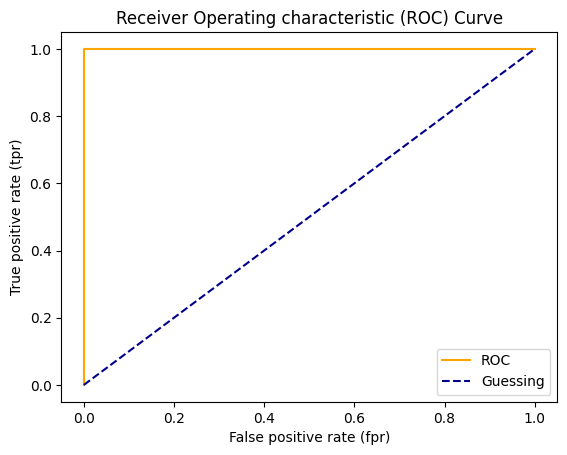

In [93]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr) and true positive (tpr) of a model.
    '''
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [95]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_tst, y_probs_positive)

1.0

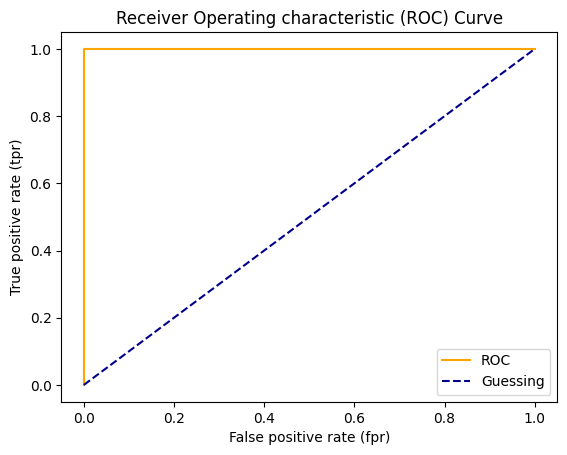

In [97]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_tst, y_tst)
plot_roc_curve(fpr, tpr)

In [99]:
roc_auc_score(y_tst, y_tst)

1.0

## For more information on metrics, refer to the following resources
- [ROC](https://www.youtube.com/watch?v=4jRBRDbJemM)
- [ROC documentation in Scikit-Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
- [How the ROC curve and AUC are calculated by Google's Machine Learning team](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [25]:
from sklearn.metrics import confusion_matrix
y_tst

99     1
296    0
89     1
30     1
234    0
      ..
173    0
94     1
161    1
216    0
91     1
Name: target, Length: 61, dtype: int64

In [32]:
y_pred = clf.predict(x_tst)
#y_pred = pd.DataFrame(y_pred)

In [33]:
confusion_matrix(y_tst, y_pred)

array([[26,  6],
       [ 1, 28]], dtype=int64)

In [34]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_tst, y_pred, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,26,6
1,1,28


False Positives: 6
False Negatives: 1

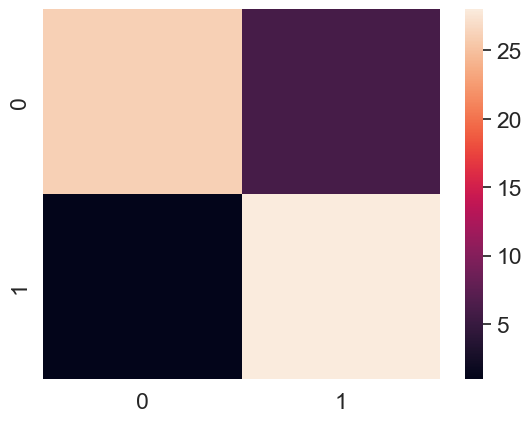

In [37]:
# Make our Confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
matrix = confusion_matrix(y_tst, y_pred)

# Plot it using Seaborn
sns.heatmap(matrix);

### Creating a confusion matrix using scikit-learn

Alternate method (install latest version of scikitlearn)

In [50]:
import sklearn
sklearn.__version__

'1.2.0'

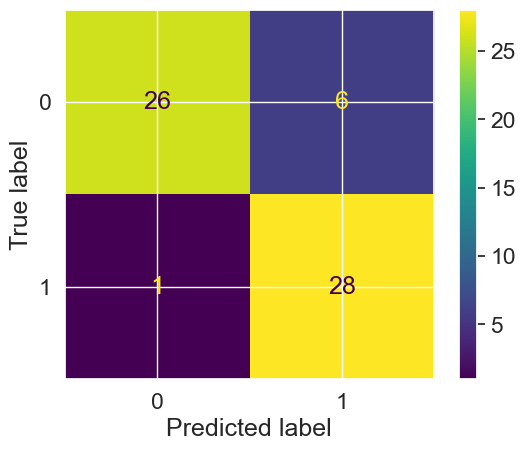

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(y_tst, y_pred, labels=clf.classes_)
graph = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=clf.classes_)

graph.plot()
plt.show()

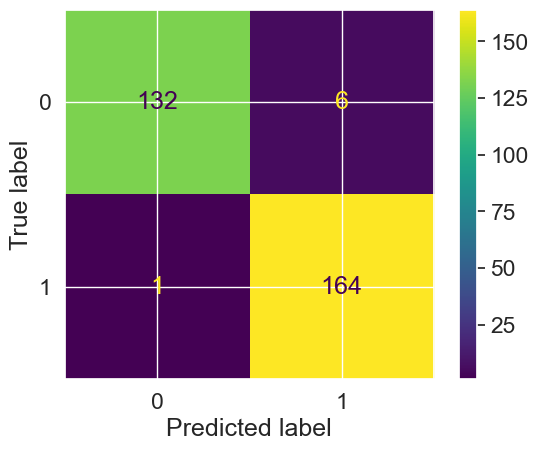

In [54]:
# Using estimator method
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y);

**Classification Report**

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_tst, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



In [66]:
# where precision and recall become valuable
disease_true = np.zeros(1000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(1000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\Karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000
